In [61]:
import sys, os
import importlib
import matplotlib.pyplot as plt

In [62]:
sys.path.append(os.path.abspath(".."))

In [ ]:
import src.eda_univariate
import src.eda_bivariate
from src.artifacts import load_df
from src.config import  CLEAN_PARQUET
importlib.reload(src.eda_univariate)
importlib.reload(src.eda_bivariate)
from src.eda_univariate import (
    target_distribution,
    data_quality_report
)
from src.eda_bivariate import (
   plot_income_violin,
   bivariate_business_insights,
   plot_bivariate
)


In [64]:
df = load_df(CLEAN_PARQUET)
print("Encoded shape:", df.shape)
df.head()

Encoded shape: (614, 13)


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,True,True
1,1.0,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,False
2,0.0,3000,0.0,66.0,360.0,1.0,True,True,False,True,False,True,True
3,0.0,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,True,True
4,0.0,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,True,True


In [65]:
data_quality_report(df)


===== DATA QUALITY REPORT =====
                         Missing Values  Missing %  Unique Values
Dependents                            0        0.0              4
ApplicantIncome                       0        0.0            505
CoapplicantIncome                     0        0.0            287
LoanAmount                            0        0.0            203
Loan_Amount_Term                      0        0.0             10
Credit_History                        0        0.0              2
Gender_Male                           0        0.0              2
Married_Yes                           0        0.0              2
Education_Not Graduate                0        0.0              2
Self_Employed_Yes                     0        0.0              2
Property_Area_Semiurban               0        0.0              2
Property_Area_Urban                   0        0.0              2
Loan_Status_Y                         0        0.0              2

👉 Business Insights:
   - No column has ex


===== Target Variable: Loan_Status_Y =====
               Count  Percent
Loan_Status_Y                
True             422    68.73
False            192    31.27
👉 Approval rate: NA% | Rejection rate: NA%


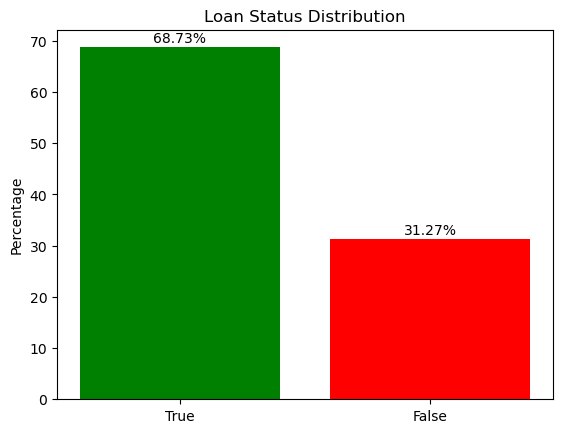

In [66]:
target_distribution(df)

In [67]:
bivariate_business_insights(df)


🔹 Bivariate Q&A Insights (using your encoded columns) 🔹

Q: Does credit history strongly impact loan approval?
👉 Insight: Credit_History=1 → 0.0% approvals; Credit_History=0 → 0.0% approvals. (Strongest driver)

Q: Do males or females have higher approval rates?
👉 Insight: Male=0.0%, Female=0.0%. Small difference.

Q: Do married applicants get more approvals?
👉 Insight: Married=0.0%, Single=0.0%. Joint income helps.

Q: Do graduates have better approval chances?
👉 Insight: Graduate=0.0%, Not Graduate=0.0%. Education helps.

Q: Do higher incomes lead to more approvals?
👉 Insight: Median income Approved=nan, Rejected=nan. Income helps, but weaker than credit.

Q: Are larger loans harder to approve?
👉 Insight: Median Loan Approved=nan, Rejected=nan. Banks prefer smaller, safer loans unless strong profiles.

Q: Do shorter terms have better approval?
Loan_Status_Y     False  True 
Loan_Amount_Term              
12.0                0.0  100.0
36.0              100.0    0.0
60.0             

In [ ]:
plot_bivariate(df, target_hint="Loan_Status_Y")

c:\Users\mukil\Downloads\Loan Approval Prediction\Loan-Approval-Prediction\src\eda_bivariate.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
c:\Users\mukil\Downloads\Loan Approval Prediction\Loan-Approval-Prediction\src\eda_bivariate.py:71: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.violinplot(


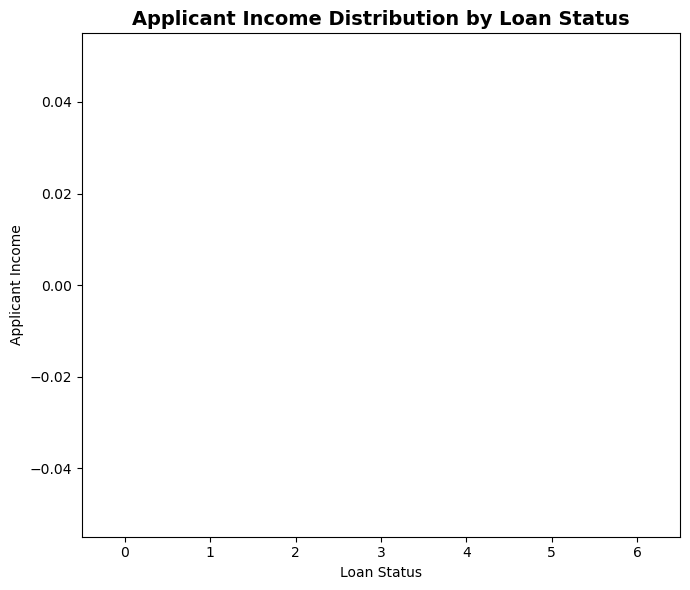

In [68]:
plot_income_violin(df)